#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [2]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

## Basic Data Exploration

the number of rows and columns in the dataset.

In [4]:
row, column = np.shape(df)
print(row)
print(column)

148654
13


determine the data types of each column.

In [5]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

check for missing values in each column.

In [6]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

## Descriptive Statistics

 Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [7]:
df["TotalPay"].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [8]:
print("mean for salary = ", np.average(df["TotalPay"]))
print("median for salary = ", np.median(df["TotalPay"]))
print("minimum for salary = ", np.min(df["TotalPay"]))
print("maximum for salary = ", np.max(df["TotalPay"]))
print("the standard deviation for salary = ", np.std(df["TotalPay"]))
print("the range of salaries [", np.min(df["TotalPay"]), "," , np.max(df["TotalPay"]), "]")
    

mean for salary =  74768.32197169267
median for salary =  71426.60999999999
minimum for salary =  -618.13
maximum for salary =  567595.43
the standard deviation for salary =  50516.8353589452
the range of salaries [ -618.13 , 567595.43 ]


## Data Cleaning

Handle missing data by suitable method with explain why you use it.

In [9]:
# we have missing data in OvertimePay ,OtherPay, BasePay, Benefits, Notes, Status

# For 'BasePay' and 'Benefits', we used statistical measures
# (mean and median, respectively) to fill in the missing values.
# This is a common approach when dealing with numerical data.


# Handling missing data in 'BasePay' using the mean value
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)

# Handling missing data in 'Benefits' using the median value
df['Benefits'].fillna(df['Benefits'].median(), inplace=True)


In [10]:
# For OvertimePay ,OtherPay we filled missing values with a default value 0.
# which mean there is no OvertimePay ,OtherPay


df['OtherPay'].fillna(0, inplace=True)
df['OvertimePay'].fillna(0, inplace=True)

In [11]:
# For 'Status', we filled missing values with a default value ('Unknown').
# This is a common approach for categorical data when
# the missing values cannot be easily inferred.

df["Status"].fillna("Unknown", inplace = True)

In [12]:
#For 'Notes', we simply dropped the column if it is not essential for analysis, and the missing values were considerable.

# salaries_df.drop('Notes', axis=1, inplace=True)

# OR if it is essential for analysis 
# we filled missing values with a default value ('Unknown').

df["Notes"].fillna("Unknown", inplace = True)

In [13]:
# Verify that missing values have been filled
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64

## Basic Data Visualization

Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

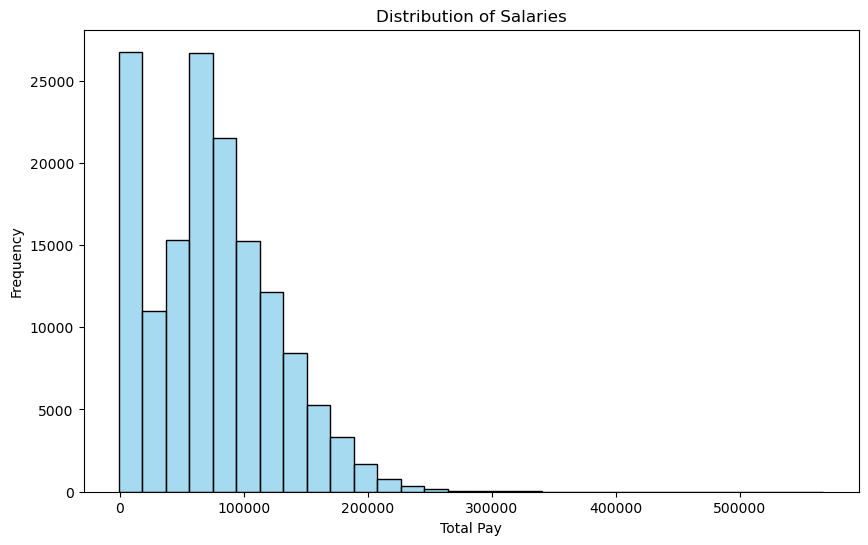

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


# Distribution of Salaries (using histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=30, color='skyblue')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

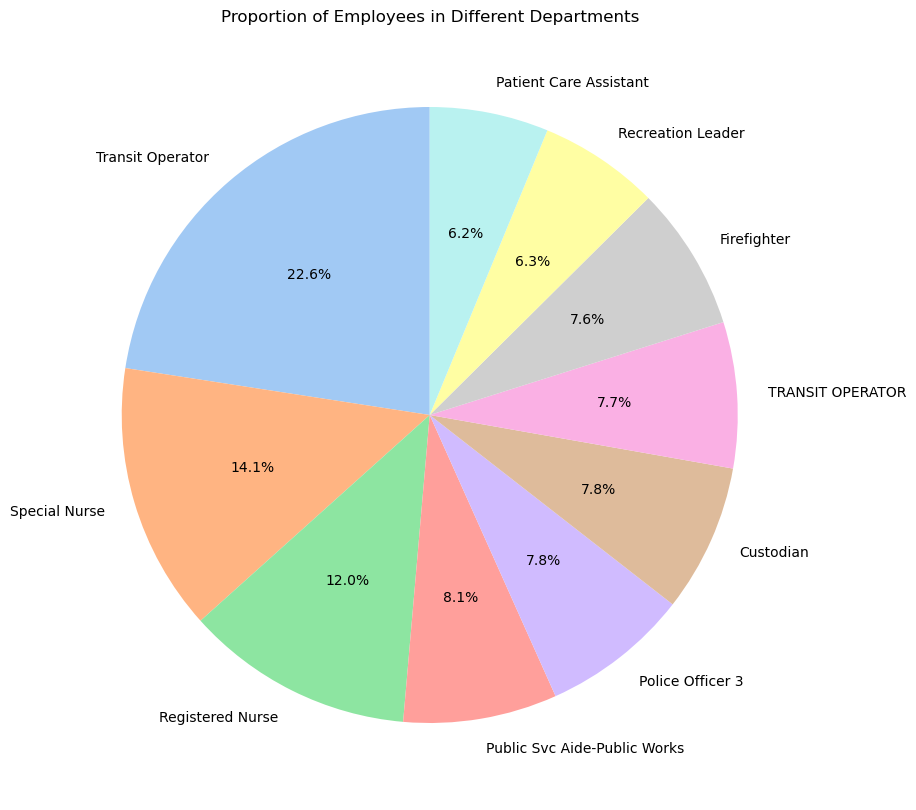

In [15]:
#Proportion of Employees in Different Departments (using pie chart)
department_counts = df['JobTitle'].value_counts()
top_departments = department_counts.head(10)  # Displaying the top 10 departments for better visibility

plt.figure(figsize=(10, 10))
plt.pie(top_departments, labels=top_departments.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Employees in Different Departments')
plt.show()

## Grouped Analysis
 Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [20]:
# first group data by Departments (JobTitle)
grouped_data = df.groupby( 'JobTitle')
grouped_data = grouped_data['TotalPay'].mean().reset_index()
grouped_data

,JobTitle,TotalPay
0,ACCOUNT CLERK,44035.664337
1,ACCOUNTANT,47429.268000
2,ACCOUNTANT INTERN,29031.742917
3,"ACPO,JuvP, Juv Prob (SFERS)",62290.780000
4,ACUPUNCTURIST,67594.400000
...,...,...
2154,X-RAY LABORATORY AIDE,52705.880385
2155,X-Ray Laboratory Aide,50823.942700
2156,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",53632.870000
2157,Youth Comm Advisor,41414.307500


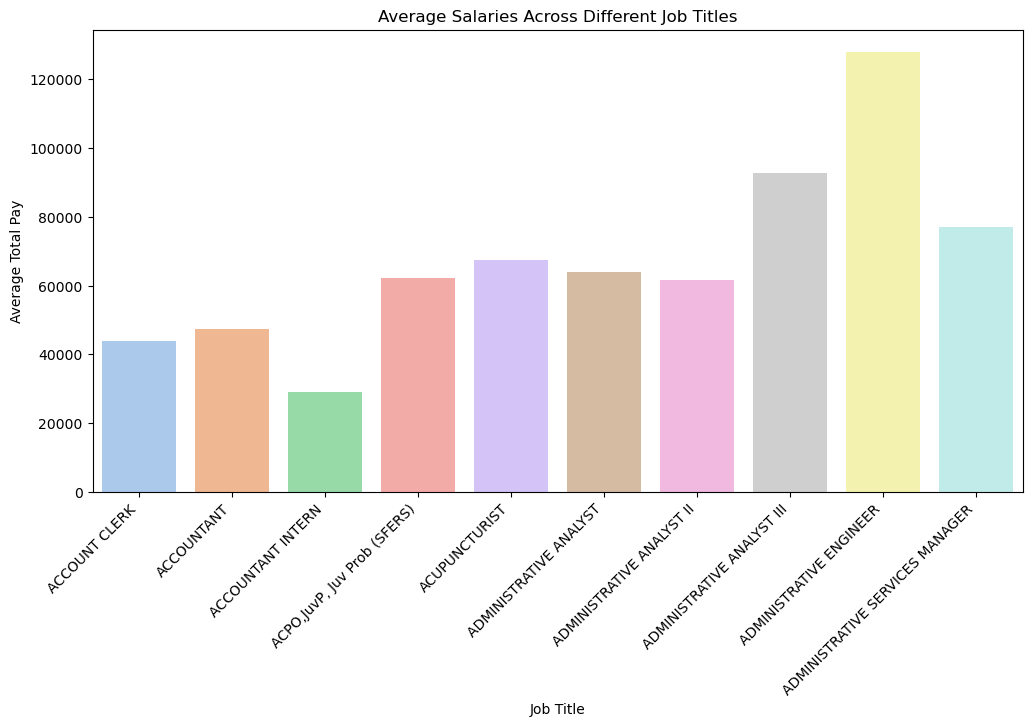

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='JobTitle', y='TotalPay', data=grouped_data.head(10), palette=sns.color_palette('pastel'))
plt.title('Average Salaries Across Different Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Average Total Pay')
plt.xticks(rotation=45, ha='right')
plt.show()

In [29]:
# second group data by Departments (JobTitle) and years
grouped_data2 = df.groupby( ['JobTitle', 'Year'])
grouped_data2 = grouped_data2['TotalPay'].mean().reset_index()


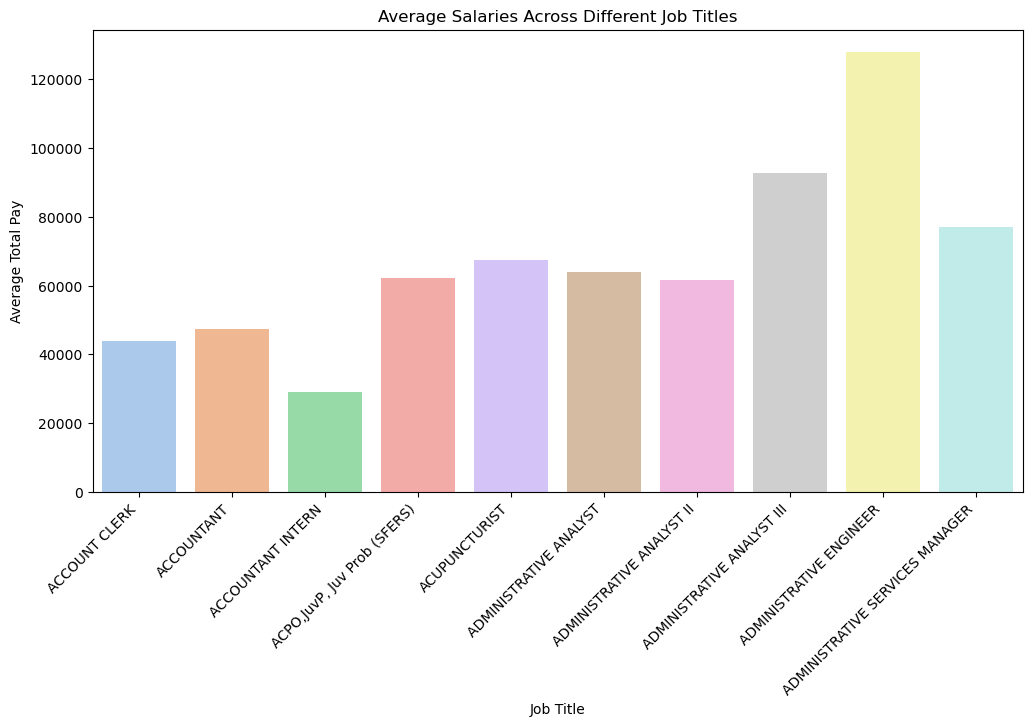

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x='JobTitle' , y='TotalPay', data=grouped_data2.head(10), palette=sns.color_palette('pastel'))
plt.title('Average Salaries Across Different Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Average Total Pay')
plt.xticks(rotation=45, ha='right')
plt.show()


## Simple Correlation Analysis
Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [47]:
# coorelation between Year and TotalPay
correlation = df['Year'].corr(df['TotalPay'])
correlation


0.032090397985590435

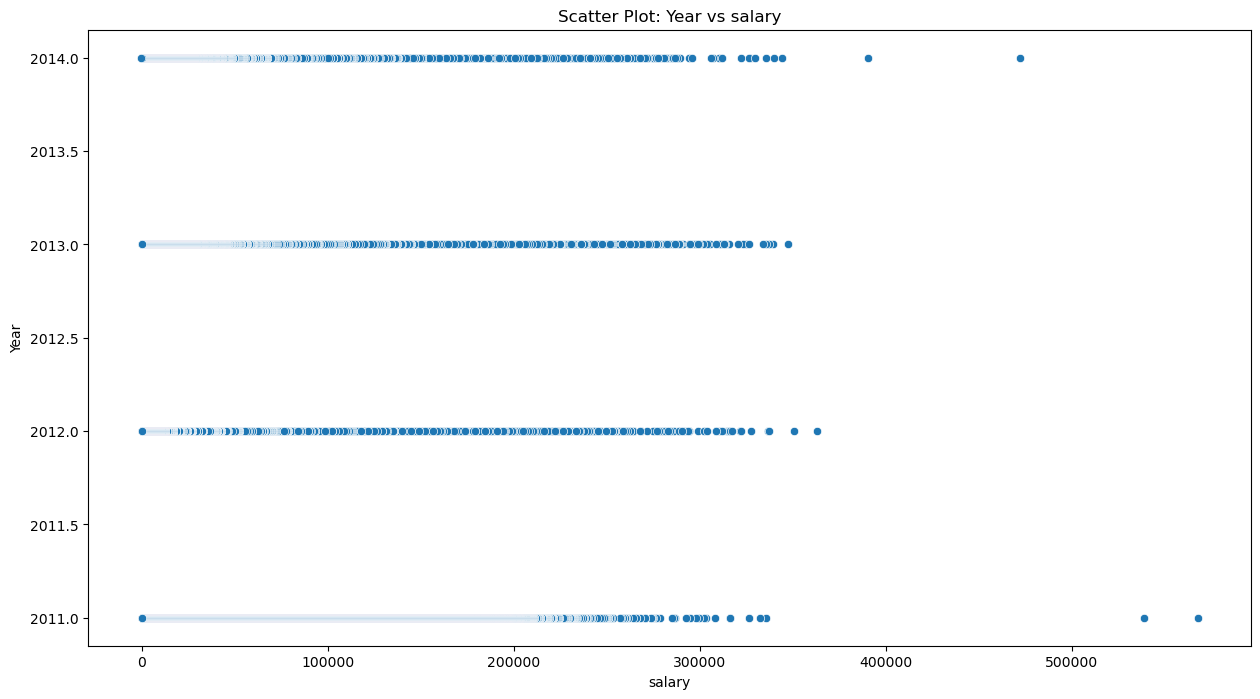

In [51]:
# a strong positive correlation. 

plt.figure(figsize=(15, 8))
sns.scatterplot(x='TotalPay', y='Year', data=df, alpha=1)
plt.title('Scatter Plot: Year vs salary')
plt.xlabel('salary')
plt.ylabel('Year')
plt.show()

## Summary of Insights
Write a brief report summarizing the findings and insights from the analyses.

The lowest salaries were observed in 2011.
In subsequent years, specifically in 2012 and 2013, salaries exhibited a relatively consistent range, hovering between 200,000 and 300,000.
However, a discernible decline in salaries is observed in 2014.

# Good Luck!